In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import argparse
import torchvision.datasets as Datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from tqdm import tqdm as tqdm_regular
from image_preprocessing import get_images
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from conv_autoencoder import *


Running on the CPU


In [3]:
class CustomDataset(Dataset):
    def __init__(self, data, transforms=None):
        self.data = data
        self.transforms = transforms
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        image = self.data[idx]
        if self.transforms!=None:
            image = self.transforms(image)
        return image

In [163]:
dataset_name = "handwashing"

In [152]:
print('Extracting features from ',  dataset_name)

Extracting features from  CIFAR10


In [153]:
if dataset_name == "CIFAR10":
    training_set = Datasets.CIFAR10(root='../data/', download=True,
                                transform=transforms.ToTensor())
    test_set = Datasets.CIFAR10(root='../data/', download=True, train=False,
                                transform=transforms.ToTensor())
    #  extracting training images
    training_images = [x for x in training_set.data]
    #  extracting validation images
    test_images = [x for x in test_set.data]
    
    #  creating pytorch datasets
    training_data = CustomDataset(training_images, transforms=transforms.Compose([transforms.ToTensor(),
                                                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
    test_data = CustomDataset(test_images, transforms=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
    visual_data = [test_data[i] for i in range(10)] #images for visualization

Files already downloaded and verified
Files already downloaded and verified


In [164]:
if dataset_name == "handwashing":
    _dir = "./images/2020-06-26_18-28-10_camera102"
    _images = get_images(_dir, '*.jpg', True)
    
    training_data, test_data = train_test_split( _images, test_size=0.3, random_state=42)
    
    visual_data, test_data = train_test_split(test_data, test_size=0.98, random_state=42)

In [165]:
len(visual_data)

7

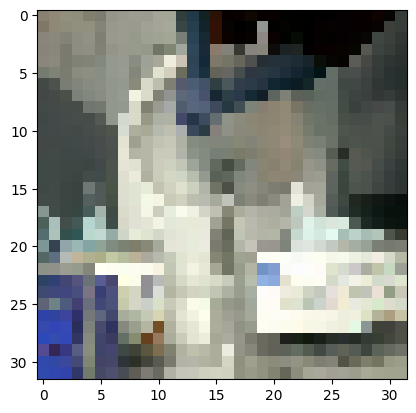

In [166]:
plt.imshow(visual_data[0].reshape(32, 32, 3))

In [167]:
model = ConvolutionalAutoencoder(Autoencoder(Encoder(), Decoder()))

In [179]:
training_args = {'loss_function': nn.MSELoss(), 'epochs': 10 , 'batch_size': 64,
                'training_set': training_data, 'test_set': test_data, 'visual_set': visual_data}

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
training...


  0%|          | 0/15 [00:00<?, ?it/s]

testing...


  0%|          | 0/7 [00:00<?, ?it/s]

training_loss: 0.0352 test_loss: 0.0524


  0%|          | 0/7 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


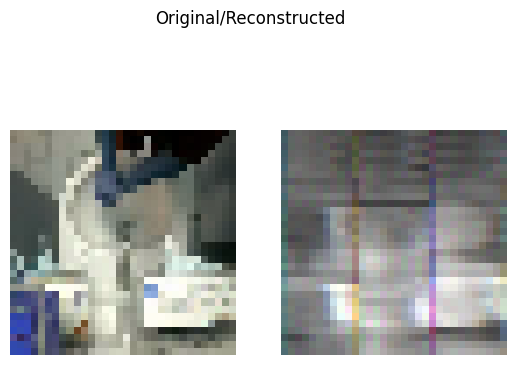

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


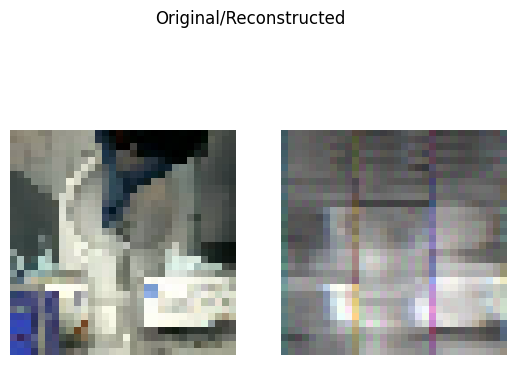

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


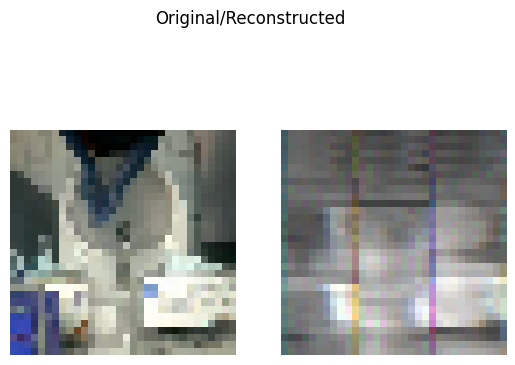

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


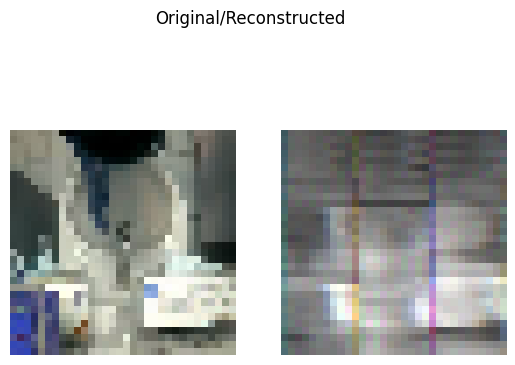

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


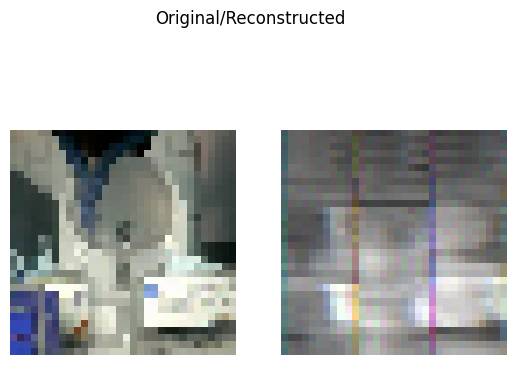

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


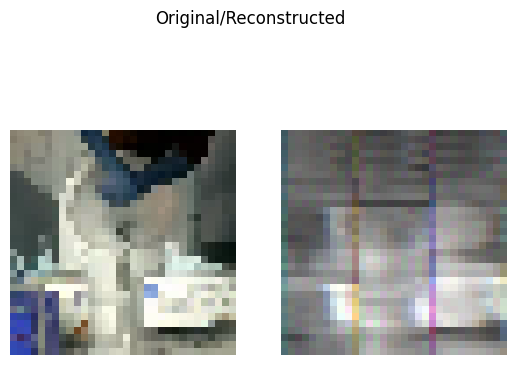

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


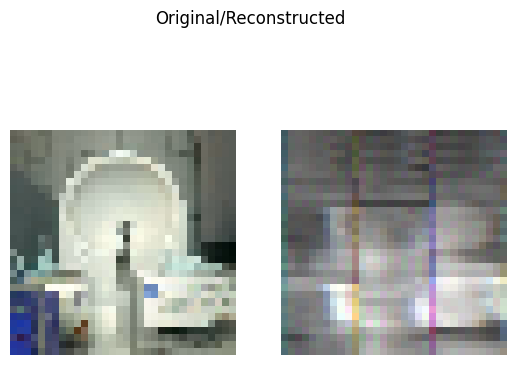

In [180]:
training_log = model.train(training_args)